In [1]:
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
import sklearn
sklearn.__version__

'0.24.2'

In [3]:
data = pd.read_csv('dataset/SpamCollection', sep = '\t', names = ["label", "message"])

In [4]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [6]:
ps = PorterStemmer()

In [7]:
corpus = []
for i in range(len(data['message'])):
    review = re.sub('[^a-zA-Z]', " ", data['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv = CountVectorizer(max_features = 2500)

In [10]:
X = cv.fit_transform(corpus).toarray()

In [11]:
X.shape

(5572, 2500)

In [12]:
label = pd.get_dummies(data['label'], drop_first = True)

In [13]:
y = np.asarray(label).reshape((5572,))
y.shape

(5572,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model = MultinomialNB().fit(X_train, y_train)

In [17]:
pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
confusion_matrix(y_test, pred)

array([[946,   9],
       [  7, 153]], dtype=int64)

In [20]:
accuracy_score(y_test, pred) * 100

98.56502242152466

In [21]:
import pickle
pickle.dump(cv, open('pkl/CountVectorizer.pkl', 'wb'))
pickle.dump(model, open('pkl/spam_classifier.pkl', 'wb'))

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

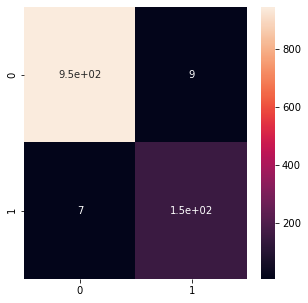

In [23]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, pred), annot = True)

## TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tv = TfidfVectorizer(max_features = 2500)

In [26]:
X = tv.fit_transform(corpus).toarray()

In [27]:
X.shape

(5572, 2500)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
model = MultinomialNB().fit(X_train, y_train)

In [30]:
pred = model.predict(X_test)

In [31]:
accuracy_score(y_test, pred) * 100

98.29596412556054

In [32]:
confusion_matrix(y_test, pred)

array([[967,   1],
       [ 18, 129]], dtype=int64)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
classi = RandomForestClassifier()

In [35]:
classi.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
predi = classi.predict(X_test)

In [37]:
accuracy_score(y_test, predi) * 100

98.65470852017937

In [38]:
confusion_matrix(y_test, predi)

array([[967,   1],
       [ 14, 133]], dtype=int64)

In [39]:
message = "you've won 10k, kindly collect your reward."
message = ' '.join([PorterStemmer().stem(word) for word in message.split()])
message = cv.transform([message]).toarray()
message = message[0].reshape((1,-1))
print(model.predict(message))
if model.predict(message):
    print("It's a SPAM Message.") 
else:
    print("It's not a SPAM Message.")

[1]
It's a SPAM Message.
